In [285]:
from gp import GP, Constant
import pandas as pd
import numpy as np
import operators as ops
from copy import copy
from random import choices, uniform
from matplotlib import pyplot as plt 
from itertools import chain, combinations

In [2]:
df = pd.DataFrame({'x': [float(x) for x in range(-100, 101)]})
df['y'] = 7 * df['x'] + 13

In [3]:
df

,x,y
0,-100.0,-687.0
1,-99.0,-680.0
2,-98.0,-673.0
3,-97.0,-666.0
4,-96.0,-659.0
...,...,...
196,96.0,685.0
197,97.0,692.0
198,98.0,699.0
199,99.0,706.0


In [4]:
gp = GP(mutation_rate = 0.2, mutation_sd=1.0, operators=[ops.SUM, ops.PROD])

In [5]:
gpt0 = gp.tree("([float]<SUM>([float]<PROD>([float]0.5)([float]x))([float]-9.0))", x = df['x'])


In [6]:
gpt0

tree("([float]<SUM>([float]<PROD>([float]0.5)([float]x))([float]-9.0))")

In [7]:
for i in range(99):
    

tree("([float]3.0)")

In [74]:
def k_best(k, trees, scores, mark_4_del=True):
    scoreboard = pd.DataFrame({
        't': trees,
        's': scores
    })
    best = scoreboard.nlargest(k, 's')['t']
    if mark_4_del:
        scoreboard['t'].apply(lambda t: t.metadata.__setitem__('to_delete', True))
        best.apply(lambda t: t.metadata.__setitem__('to_delete', False))
    return list(best)
    

In [172]:
for i in range(28):
    imses = [1/(np.square(t() - df['y'])).mean() for t in gp.get_all_root_nodes()[float]]
    bestscores.append(1/max(imses))
    k_best(5, gp.get_all_root_nodes()[float], imses)
    old_gen = gp.get_all_root_nodes()[float]
    new_gen = [t.copy(gp_copy=True) for t in choices(old_gen, imses, k=pop-elitism)]
    for t in filter(lambda t: t.metadata['to_delete'] == True, old_gen):
        t.delete()
    
imses = [1/(np.square(t() - df['y'])).mean() for t in gp.get_all_root_nodes()[float]]
bestscores.append(1/max(imses))
print(bestscores[-1]**.5)
print(bestscores)
print(k_best(1, gp.get_all_root_nodes()[float], imses, mark_4_del=False))

0.11241908138381157
[81381.52459604309, 26428.32053545721, 12043.47364271643, 1707.5926784604433, 1581.6934600899745, 1581.6934600899745, 557.7224182660153, 557.7224182660153, 557.7224182660153, 534.9890099192444, 510.3177867204252, 499.87414023506454, 473.59239693095435, 465.28832823788696, 462.539251811518, 447.41134069563094, 446.5526017910868, 431.0779161016009, 370.1368581901017, 370.1368581901017, 345.1427721460279, 317.70393317788063, 293.6280956893298, 293.6280956893298, 191.17513443855498, 191.17513443855498, 191.17513443855498, 167.49068443181773, 132.94659330359875, 128.4814123760521, 128.4814123760521, 89.99774289780544, 89.99774289780544, 77.76340296377684, 63.14912673388637, 61.580230217472256, 61.580230217472256, 57.36563358755077, 49.09019253342789, 49.09019253342789, 45.54548127176751, 35.249175126088595, 35.249175126088595, 28.52148622451274, 23.782874704439646, 23.782874704439646, 18.300226206230285, 15.273511023910867, 8.290509590572103, 2.881027097715511, 0.3764635

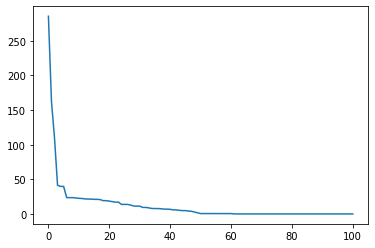

In [176]:
plt.plot([s**0.5 for s in bestscores])

In [269]:
def all_sums(tot, k): # do a video on this
    if tot < k:
        print('wut')
    if tot==k:
        return ((1,) * k,)
    elif k==1:
        return ((tot,),)
    else:
        sums = ()
        first = tot - (k-1)
        while first > 0:
            tails = all_sums(tot-first, k-1)
            t = tails[0]
            sums += tuple((first,) + tail for tail in tails)
            first -= 1
        return sums

all_sums(1,0)

RecursionError: maximum recursion depth exceeded in comparison

In [280]:
def poly_terms(vars_, order): 
    combos = tuple(chain.from_iterable(combinations(vars_, r) for r in range(order+1)))
    print(tuple(combos))
    terms = []
    for n in range(order+1):
        print(len(combos[0]), '<=', n)
        for c in filter(lambda combo: len(combo) <= n, combos):
            if len(c):
                terms += [(c, powers) for powers in all_sums(n, len(c))]
            elif not n:
                terms.append(((), ()))
    return tuple(terms)

In [282]:
list(poly_terms(('v', 'w', 'x', 'y', 'z', 'a'), 4))

((), ('v',), ('w',), ('x',), ('y',), ('z',), ('a',), ('v', 'w'), ('v', 'x'), ('v', 'y'), ('v', 'z'), ('v', 'a'), ('w', 'x'), ('w', 'y'), ('w', 'z'), ('w', 'a'), ('x', 'y'), ('x', 'z'), ('x', 'a'), ('y', 'z'), ('y', 'a'), ('z', 'a'), ('v', 'w', 'x'), ('v', 'w', 'y'), ('v', 'w', 'z'), ('v', 'w', 'a'), ('v', 'x', 'y'), ('v', 'x', 'z'), ('v', 'x', 'a'), ('v', 'y', 'z'), ('v', 'y', 'a'), ('v', 'z', 'a'), ('w', 'x', 'y'), ('w', 'x', 'z'), ('w', 'x', 'a'), ('w', 'y', 'z'), ('w', 'y', 'a'), ('w', 'z', 'a'), ('x', 'y', 'z'), ('x', 'y', 'a'), ('x', 'z', 'a'), ('y', 'z', 'a'), ('v', 'w', 'x', 'y'), ('v', 'w', 'x', 'z'), ('v', 'w', 'x', 'a'), ('v', 'w', 'y', 'z'), ('v', 'w', 'y', 'a'), ('v', 'w', 'z', 'a'), ('v', 'x', 'y', 'z'), ('v', 'x', 'y', 'a'), ('v', 'x', 'z', 'a'), ('v', 'y', 'z', 'a'), ('w', 'x', 'y', 'z'), ('w', 'x', 'y', 'a'), ('w', 'x', 'z', 'a'), ('w', 'y', 'z', 'a'), ('x', 'y', 'z', 'a'))
0 <= 0
waa
0 <= 1
0 <= 2
0 <= 3
0 <= 4


[((), ()),
 (('v',), (1,)),
 (('w',), (1,)),
 (('x',), (1,)),
 (('y',), (1,)),
 (('z',), (1,)),
 (('a',), (1,)),
 (('v',), (2,)),
 (('w',), (2,)),
 (('x',), (2,)),
 (('y',), (2,)),
 (('z',), (2,)),
 (('a',), (2,)),
 (('v', 'w'), (1, 1)),
 (('v', 'x'), (1, 1)),
 (('v', 'y'), (1, 1)),
 (('v', 'z'), (1, 1)),
 (('v', 'a'), (1, 1)),
 (('w', 'x'), (1, 1)),
 (('w', 'y'), (1, 1)),
 (('w', 'z'), (1, 1)),
 (('w', 'a'), (1, 1)),
 (('x', 'y'), (1, 1)),
 (('x', 'z'), (1, 1)),
 (('x', 'a'), (1, 1)),
 (('y', 'z'), (1, 1)),
 (('y', 'a'), (1, 1)),
 (('z', 'a'), (1, 1)),
 (('v',), (3,)),
 (('w',), (3,)),
 (('x',), (3,)),
 (('y',), (3,)),
 (('z',), (3,)),
 (('a',), (3,)),
 (('v', 'w'), (2, 1)),
 (('v', 'w'), (1, 2)),
 (('v', 'x'), (2, 1)),
 (('v', 'x'), (1, 2)),
 (('v', 'y'), (2, 1)),
 (('v', 'y'), (1, 2)),
 (('v', 'z'), (2, 1)),
 (('v', 'z'), (1, 2)),
 (('v', 'a'), (2, 1)),
 (('v', 'a'), (1, 2)),
 (('w', 'x'), (2, 1)),
 (('w', 'x'), (1, 2)),
 (('w', 'y'), (2, 1)),
 (('w', 'y'), (1, 2)),
 (('w', 'z'), (2

In [190]:
c = ('a', 'b', 'c', 'd')
(c, tuple([1] * len(c)))

(('a', 'b', 'c', 'd'), (1, 1, 1, 1))

In [192]:
(1,) * 3

(1, 1, 1)

In [193]:
tuple((1,))

(1,)

In [263]:
n = 4
f = filter(lambda combo: len(combo) <= n, ["combos", 'pum', 'bup', 'murr'])

In [286]:
df_vars = pd.DataFrame({
    'a': [uniform(-100, 100) for i in range(20)],
    'b': [uniform(-100, 100) for i in range(20)],
    'c': [uniform(-100, 100) for i in range(20)],
    'd': [uniform(-100, 100) for i in range(20)],
    'e': [uniform(-100, 100) for i in range(20)]
})
df_vars

,a,b,c,d,e
0,-16.863037,-95.138633,-10.965624,43.668115,42.684341
1,-32.268966,-18.837979,-27.569932,-89.775431,-95.320669
2,24.275786,-47.924789,34.758628,52.175623,87.784445
3,59.625620,22.055025,79.851172,-43.763232,52.505449
4,73.935882,-43.023794,-76.717743,-43.880959,19.789356
5,-92.455892,-54.826566,8.721879,-93.876193,17.513983
6,-87.380704,-32.326731,81.170607,14.313691,2.787542
7,-93.803882,-98.849419,85.806883,-53.872887,-47.139213
8,-11.935573,39.979989,28.285092,69.933469,-24.372546
9,39.622903,12.910389,23.007397,59.469616,-33.346341


In [289]:
list(poly_terms(df_vars, 3))

((), ('a',), ('b',), ('c',), ('d',), ('e',), ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('c', 'd'), ('c', 'e'), ('d', 'e'), ('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'b', 'e'), ('a', 'c', 'd'), ('a', 'c', 'e'), ('a', 'd', 'e'), ('b', 'c', 'd'), ('b', 'c', 'e'), ('b', 'd', 'e'), ('c', 'd', 'e'))
0 <= 0
waa
0 <= 1
0 <= 2
0 <= 3


[((), ()),
 (('a',), (1,)),
 (('b',), (1,)),
 (('c',), (1,)),
 (('d',), (1,)),
 (('e',), (1,)),
 (('a',), (2,)),
 (('b',), (2,)),
 (('c',), (2,)),
 (('d',), (2,)),
 (('e',), (2,)),
 (('a', 'b'), (1, 1)),
 (('a', 'c'), (1, 1)),
 (('a', 'd'), (1, 1)),
 (('a', 'e'), (1, 1)),
 (('b', 'c'), (1, 1)),
 (('b', 'd'), (1, 1)),
 (('b', 'e'), (1, 1)),
 (('c', 'd'), (1, 1)),
 (('c', 'e'), (1, 1)),
 (('d', 'e'), (1, 1)),
 (('a',), (3,)),
 (('b',), (3,)),
 (('c',), (3,)),
 (('d',), (3,)),
 (('e',), (3,)),
 (('a', 'b'), (2, 1)),
 (('a', 'b'), (1, 2)),
 (('a', 'c'), (2, 1)),
 (('a', 'c'), (1, 2)),
 (('a', 'd'), (2, 1)),
 (('a', 'd'), (1, 2)),
 (('a', 'e'), (2, 1)),
 (('a', 'e'), (1, 2)),
 (('b', 'c'), (2, 1)),
 (('b', 'c'), (1, 2)),
 (('b', 'd'), (2, 1)),
 (('b', 'd'), (1, 2)),
 (('b', 'e'), (2, 1)),
 (('b', 'e'), (1, 2)),
 (('c', 'd'), (2, 1)),
 (('c', 'd'), (1, 2)),
 (('c', 'e'), (2, 1)),
 (('c', 'e'), (1, 2)),
 (('d', 'e'), (2, 1)),
 (('d', 'e'), (1, 2)),
 (('a', 'b', 'c'), (1, 1, 1)),
 (('a', 'b', 

In [291]:
v = [4,1,3,2]
sorted(v)

[1, 2, 3, 4]

In [292]:
v

[4, 1, 3, 2]